# 1. Predicting temperature
In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. You will download the dataset from Kaggle. To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
weather_df = pd.read_csv('weatherHistory.csv')
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


- Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing and pressure. Estimate the model using OLS

In [3]:
y = weather_df['Temperature (C)']
X = weather_df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']]

lrm = LinearRegression()

lrm.fit(X, y)

print('Coefficients:', lrm.coef_)
print('\n\nIntercept:', lrm.intercept_)

Coefficients: [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]


Intercept: 37.92643818528532


- Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

In [4]:
y_pred = lrm.predict(X)

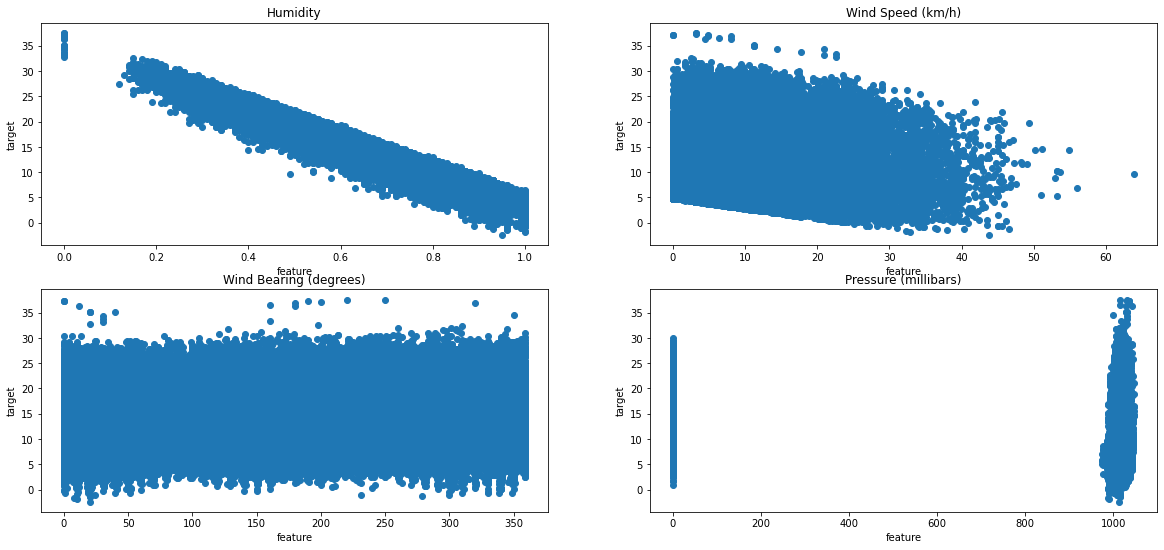

In [5]:
#  Assumption one: linearity of the model in the coefficients

plt.figure(figsize=(20, 9))
for i, col in enumerate(X.columns) : 
    plt.subplot(2,2,i+1)
    plt.scatter(X[col], y_pred)
    plt.xlabel("feature")
    plt.ylabel("target")
    plt.title(col)
plt.show()

   #### As can be clearly seen, the relationship between the humidity variable and the target variable is linear.Wind speed is also partially linear.The other two variables do not satisfy linearity.

In [6]:
# Assumption two: the error term should be zero on average

errors = y - y_pred

print("Mean of the errors in the medical costs model is: {:.15f}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -0.000000000000002


   #### Since we include the constant term in the model, the mean of the model's error is fairly close to zero.

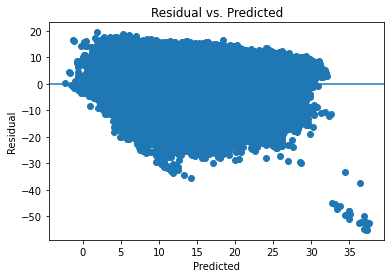

In [7]:
# Assumption three: homoscedasticity

plt.scatter(y_pred, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [8]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(y_pred, errors)
lev_stats = levene(y_pred, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


   ####  The null hypothesis for both tests is that the errors are homoscedastic.The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

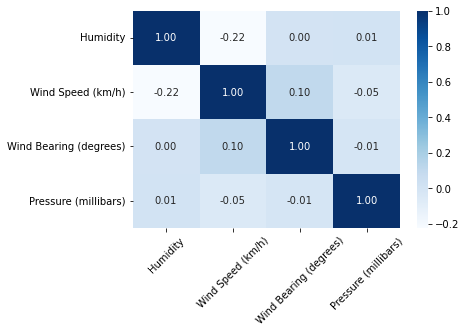

In [9]:
#  Assumption four: low multicollinearity
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.xticks(rotation=45)
plt.show()

   #### There is no multicollinearity since there are no highly correlated variables with each other.   

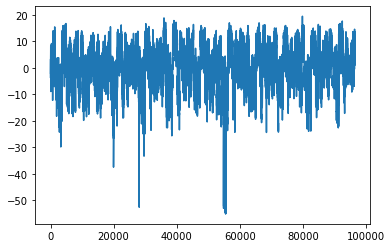

In [10]:
# Assumption five: error terms should be uncorrelated with one other (visualization)

plt.plot(errors)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


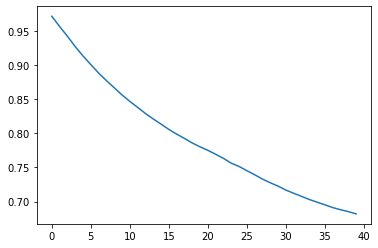

In [11]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

   #### The autocorrelation between the errors of our model is  very high (ranging between 0.70 and 0.95).

###   Assumption six: features shouldn't be correlated with the errors

   #### Explanatory variables and errors should be independent. If this assumption doesn't hold, then the model's predictions will be unreliable as the estimates of the coefficients would be biased.

### The normality of the errors

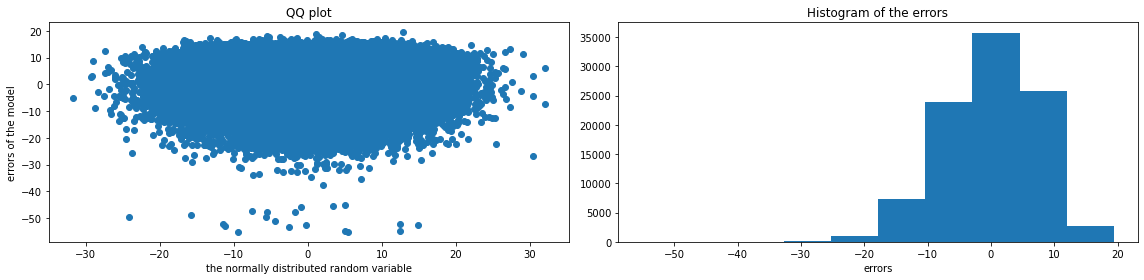

In [12]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [14]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.2967352523606 and p value is 0.0
Normality test statistics is 3375.4323076995797 and p value is 0.0


   #### The p-values of both tests indicate that our errors are not normally distributed.

#  2. House prices

In [15]:
df = pd.read_csv("house_df.csv")
df.head()

,Id,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,SalePrice,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,...,HeatingQC_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3
0,1,0.5,0.380070,0.281573,-0.269652,208500,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2,0.0,-0.312090,-0.082816,0.538308,181500,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,3,0.5,0.497489,0.530021,-0.142289,223500,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,4,0.5,0.390885,0.670807,-0.468657,140000,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,5,1.0,1.134029,1.474120,0.305473,250000,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


-  Reimplement the model you built in the previous lesson. 

In [16]:
y = df['SalePrice']
X = df.drop('SalePrice',axis=1)

In [17]:
from sklearn import linear_model

In [18]:
lrm = linear_model.LinearRegression()
lrm.fit(X, y)

LinearRegression()

In [19]:
print('Coefficients:\n\n {}\n'.format(lrm.coef_))
print('Intercept: {}'.format(lrm.intercept_))

Coefficients:

 [-2.61726269e+00  2.83420619e+04  3.28458533e+04  9.84376416e+03
  9.51742780e+03  6.47941522e+03  1.19077874e+04 -2.58424875e+04
 -2.43025311e+04  3.73373512e+03  1.44139849e+04  1.47526605e+04
  1.26812516e+04  5.19758592e+04 -3.43898153e+03  1.26679297e+04
  1.74457573e+04  1.95759471e+04  2.65297263e+04  1.10923814e+04
 -5.25345799e+03  1.37217921e+04 -1.78051562e+04  3.61572742e+03
 -5.81048983e+03 -8.92268456e+03 -3.97801132e+04 -3.04379554e+04
 -3.74925898e+04 -6.79882074e+03 -3.24878492e+03 -1.22527558e+04
 -6.91559875e+03 -2.92561226e+04 -2.00457368e+04 -2.37216761e+04
 -3.29108852e+04 -1.94219511e+04 -2.79756559e+04  6.37385696e+03
  2.87965349e+04 -8.63464210e+04]

Intercept: 234779.28163158725


In [20]:
y_pred = lrm.predict(X)

- Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

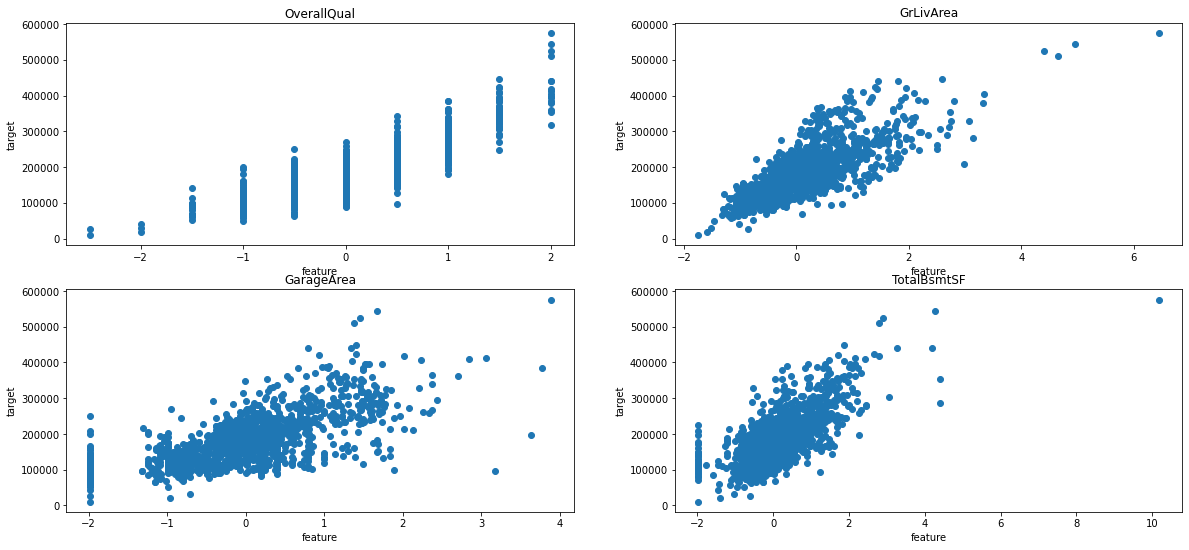

In [21]:
# Assumption one: linearity of the model in the coefficients

cols_num = ['OverallQual','GrLivArea','GarageArea','TotalBsmtSF']

plt.figure(figsize=(20, 9))
for i,col in enumerate(cols_num) : 
    plt.subplot(2,2,i+1)
    plt.scatter(X[col], y_pred)
    plt.xlabel("feature")
    plt.ylabel("target")
    plt.title(col)
plt.show()

   #### All numerical variables satisfy the first assumption

In [22]:
# Assumption two: the error term should be zero on average

errors = y - y_pred

print("Mean of the errors in house prices model is: {:.12f}".format(np.mean(errors)))

Mean of the errors in house prices model is: 0.000000000003


   #### The average of the model's error is effectively zero.

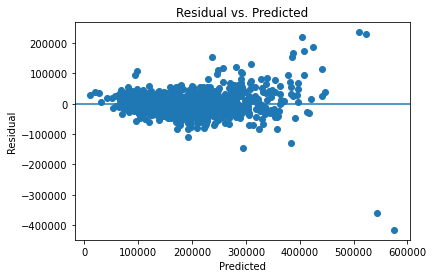

In [23]:
# Assumption three: homoscedasticity

plt.scatter(y_pred, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [24]:
bart_stats = bartlett(y_pred, errors)
lev_stats = levene(y_pred, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 768.285 and p value is 4.24e-169
Levene test statistic value is 574.502 and p value is 4.83e-116


   #### The p-values of both tests are lower than 0.05 . So, the test results reject the null hypothesis which means our errors are heteroscedastic.

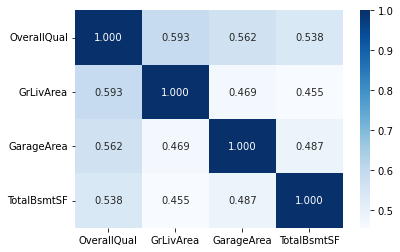

In [25]:
# Assumption four: low multicollinearity

sns.heatmap(X[cols_num].corr(), annot=True, fmt='.3f', cmap='Blues')
plt.show()

  ####  There is a correlation, though not strong, between numerical features.

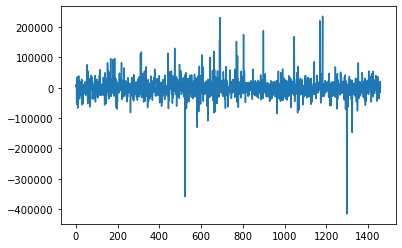

In [26]:
# Assumption five: error terms should be uncorrelated with one other (visualization)

plt.plot(errors)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


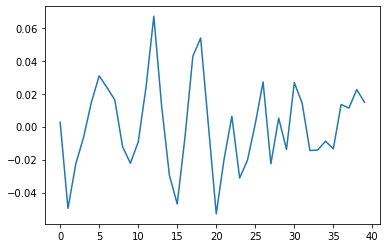

In [27]:
acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

   #### So, the autocorrelation between the errors of our model is indeed very low (ranging between -0.06 and 0.06).

In [28]:
# the normality of the errors

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 57814.44728523479 and p value is 0.0
Normality test statistics is 595.4227461732867 and p value is 5.076839907540525e-130


    - The p-values of both tests indicate that our errors are not normally distributed.